<a href="https://colab.research.google.com/github/cristiancastano852/Predict-students-dropout-and-academic-success/blob/main/06_modelo_Gradiente_Boosting_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset that was downloaded from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv is read.

In [ ]:
# Traemos los datos desde GitHub
! git clone https://github.com/cristiancastano852/Predict-students-dropout-and-academic-success

Cloning into 'Predict-students-dropout-and-academic-success'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 3), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (9/9), 212.43 KiB | 3.66 MiB/s, done.


In [ ]:
#Importamos las librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

In [ ]:


#Leemos nuestros datos
df = pd.read_csv('/content/Predict-students-dropout-and-academic-success/dataset_procesado.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,6,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,15,1,1,1,1,10,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,22,27,10,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,22,27,8,5,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [ ]:
df["Target"].unique()

array([0, 1, 2])

In [ ]:
#Nuestra columna a predecir se llama 'Target'
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear y ajustar el modelo Gradient Boosting Tree
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)


GradientBoostingClassifier()

In [ ]:
# Realizar predicciones en el conjunto de prueba
predicciones = gbm.predict(X_test)

In [ ]:
# Calcular el log loss
probabilidades = gbm.predict_proba(X_test)
logloss = log_loss(y_test, probabilidades)
print("El logLogss para el modelo Gradiente Boosting Tree es: ", logloss)


El logLogss para el modelo Gradiente Boosting Tree es:  0.5944320596667099


In [ ]:
# Evaluar la precisión del modelo en los datos de prueba
y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión: {:.2f}%".format(accuracy*100))

Precisión: 76.38%


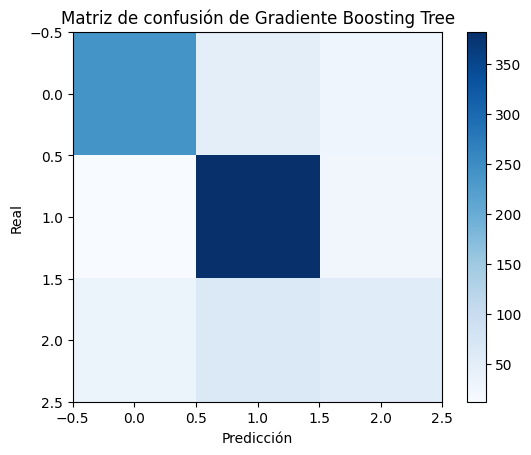

In [ ]:
# Mostrar la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap="Blues")
plt.title("Matriz de confusión de Gradiente Boosting Tree")
plt.colorbar()
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Recordemos cual es cada clase

Dropout: 0

Graduate: 1

Enrolled': 2

In [ ]:
# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       316
           1       0.77      0.91      0.84       418
           2       0.51      0.36      0.42       151

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



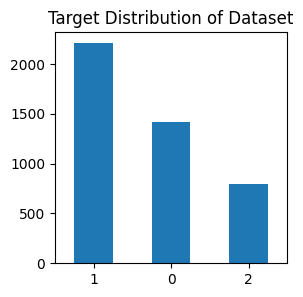

In [ ]:
df = df[df.Target != "2"]
df["Target"].unique()
df
df["Target"].value_counts().plot(kind="bar", figsize=(3,3), title="Target Distribution of Dataset")
plt.xticks(rotation=0)
plt.show()